column: 147개
- 0~18 : 음악 취향
- 19~30 : 영화 취향
- 31~62 : 취미/관심사
- 63~72 : 공포증
- 73~75 : 건강 습관
- 76~132 : 성격, 인생관 등
- 133~139 : 소비 습관
- 140~146 : 기본 정보

In [1]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('../data/young_survey.csv')
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Handedness,Education
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right,bachelor's degree
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right,bachelor's degree
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right,high school
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,4.0,4,1.0,22.0,172.0,59.0,1.0,female,right,bachelor's degree
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,3.0,2,4.0,20.0,170.0,59.0,1.0,female,right,high school


#### 기본 정보만 추출

In [4]:
# 기본 정보
basic_info = df.iloc[:, 140:]
basic_info.head()

,Age,Height,Weight,Number of siblings,Gender,Handedness,Education
0,20.0,163.0,48.0,1.0,female,right,bachelor's degree
1,19.0,163.0,58.0,2.0,female,right,bachelor's degree
2,20.0,176.0,67.0,2.0,female,right,high school
3,22.0,172.0,59.0,1.0,female,right,bachelor's degree
4,20.0,170.0,59.0,1.0,female,right,high school


#### 통계를 통한 데이터 파악

In [5]:
basic_info.describe()   # 수치형 데이터인 컬럼만 집계됨.

,Age,Height,Weight,Number of siblings
count,997.000000,982.000000,981.000000,995.000000
mean,20.439318,173.610998,66.407747,1.300503
std,2.835443,9.373842,13.862403,1.015548
min,15.000000,148.000000,41.000000,0.000000
25%,19.000000,167.000000,55.000000,1.000000
50%,20.000000,173.000000,64.000000,1.000000
75%,22.000000,180.000000,75.000000,2.000000
max,30.000000,203.000000,165.000000,10.000000


In [6]:
# 수치형 데이터가 아닌 컬럼 살펴보기
basic_info['Gender'].value_counts()

Gender
female    587
male      405
Name: count, dtype: int64

In [7]:
basic_info['Handedness'].value_counts()

Handedness
right    895
left      99
Name: count, dtype: int64

In [8]:
basic_info['Education'].value_counts()

Education
high school          618
bachelor's degree    207
middle school         78
master's degree       78
elementary school     10
doctorate degree       5
Name: count, dtype: int64

#### 그래프를 이용한 데이터 파악

<Axes: ylabel='Age'>

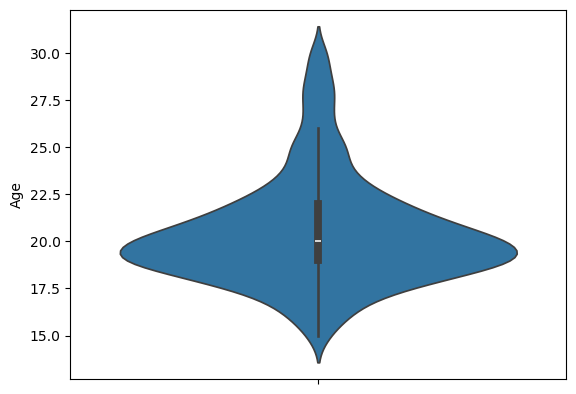

In [ ]:
# 나이 분포 살펴보기기
sns.violinplot(data=basic_info, y='Age')
    # 10대 후반 ~ 20대 후반이 대다수.

<Axes: xlabel='Gender', ylabel='Age'>

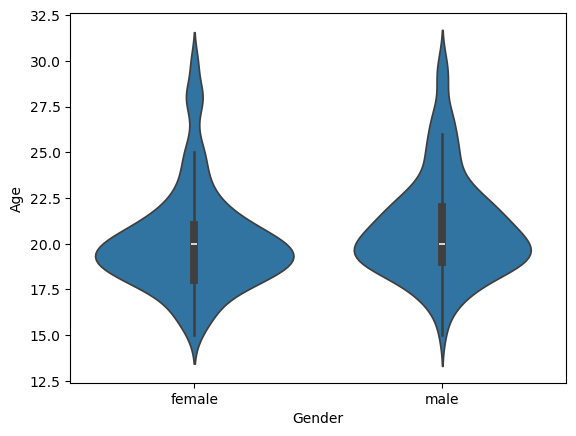

In [12]:
# 성별에 따른 나이 분포
sns.violinplot(data=basic_info, x='Gender', y='Age')
    # 분포가 거의 비슷 - 남녀 관계없이 주로 10대 후반 ~ 20대 초반에 대한 인사이트를 얻을 수 O.

<Axes: xlabel='Gender', ylabel='Age'>

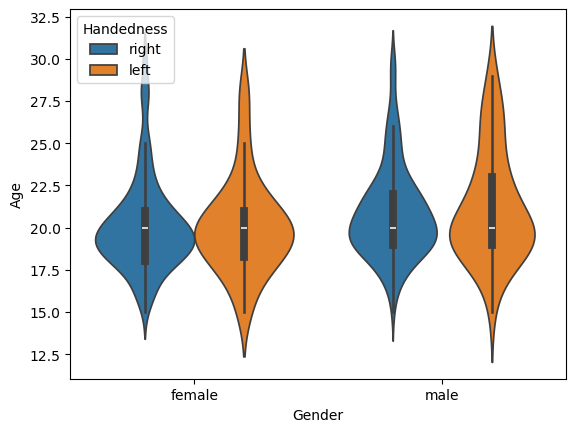

In [ ]:
# 왼손잡이와 오른손잡이 포함
sns.violinplot(data=basic_info, x='Gender', y='Age', hue='Handedness')

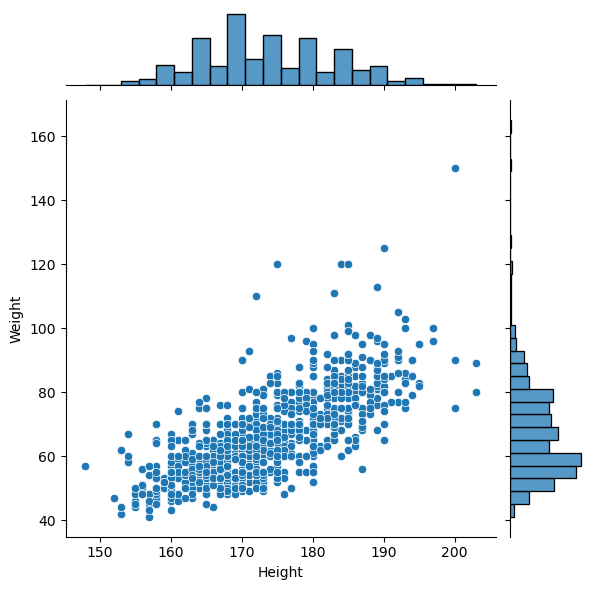

In [ ]:
# 키와 몸무게
sns.jointplot(data=basic_info, x='Height', y='Weight')
    # 키와 몸무게의 상관관계를 나타내는 산점도 그래프와, 각 컬럼의 히스토그램을 같이 볼 수 있음.